In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#for graph
import seaborn as sns
#visulaizer
from sklearn.model_selection import train_test_split
# used to split data
from sklearn.ensemble import RandomForestClassifier
# random forest classifier
from sklearn.metrics import accuracy_score
# how well our data performed

In [2]:
# loading the dataset to a pandas dataframe
wine_dataset = pd.read_csv('winequality-red.csv')


In [3]:
wine_dataset.shape

(1599, 12)

In [4]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# no missing value

In [11]:
# statical measure of the dataset
wine_dataset.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


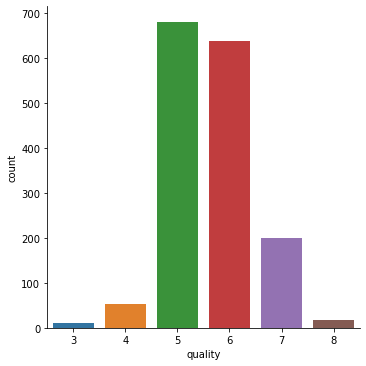

In [12]:
# num of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')
# ?

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

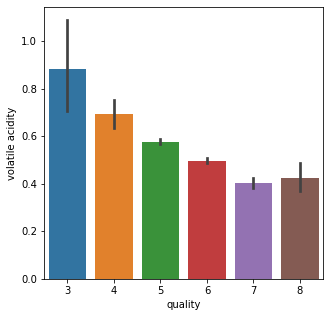

In [24]:
# volaitle acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data = wine_dataset)


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

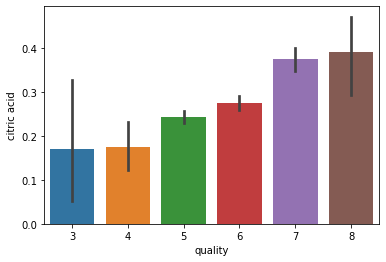

In [21]:
# citric acid vs qulity
plot = plt.figure()
sns.barplot(x = 'quality', y='citric acid', data = wine_dataset)

In [25]:
# corelation
# positive corelation
# negative corelation

In [32]:
correlation = wine_dataset.corr()

<AxesSubplot:>

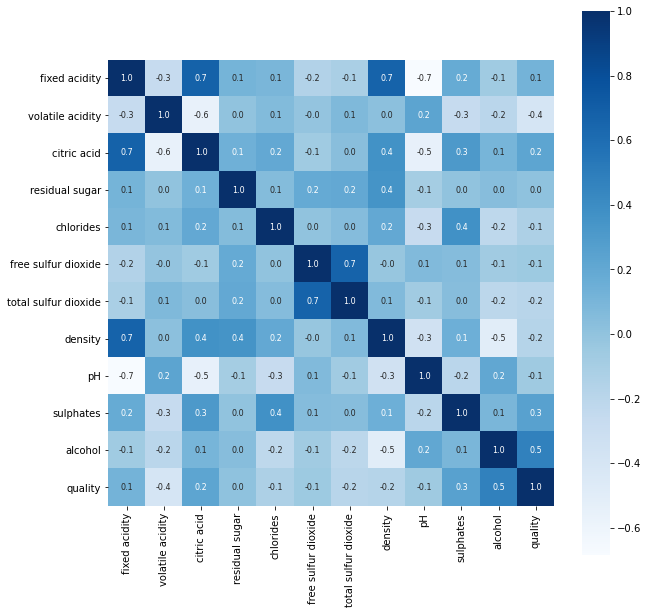

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap='Blues')



<AxesSubplot:>

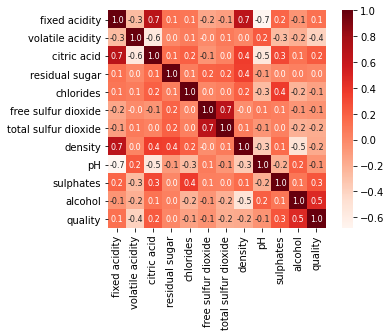

In [36]:
plt.figure()
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap='Reds')
# if 1.0 relation exactly 2 columns the same
# light colors less related negative value 

In [37]:
# data preprocessing
# separate the data and lable
X = wine_dataset.drop('quality', axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
# lable binarization
# quality > 7 good
# quality < 7 bad


In [45]:
Y = wine_dataset['quality'].apply(lambda y_vlaue: 1 
                                  if y_vlaue>=7 
                                  else 0)
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [46]:
# tain and test split
X_train, X_test,  Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [47]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [ ]:
# Model Training:
# Random Forest Classifier
# mean mutliple decsion tree to accurate the value

In [48]:
model = RandomForestClassifier()

In [49]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
# evaluate
# accuracy score

In [51]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [52]:
test_data_accuracy
# accuracy out of 1(perfect match)

0.928125

In [54]:
# Build prediction system
input_data = (7.4, 0.66, 0, 1.8, 0.075, 13, 40, 0.9978, 3.51, 0.56, 9.4)
# the above value is randomly select form csv file except quality 
# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
prediction

array([0], dtype=int64)

In [56]:
# sample2
input_data = (12.7, 0.6, 0.65, 2.3, 0.063, 6, 25, 0.9997, 3.03, 0.57, 9.9)


input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

if(prediction[0]==1):
    print('Good Quality')
else:
    print('Bad Quality')

Bad Quality


In [57]:
# sample 3
input_data = (7.3, 0.65, 0, 1.2, 0.065, 15, 21, 0.9946, 3.39, 0.47, 10)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

if(prediction[0]==1):
    print('Good Quality')
else:
    print('Bad Quality')


Good Quality
